In [2]:
import pandas as pd

In [4]:
data_latih = pd.read_csv('../tfidf/TFIDF-dataset_mobil_listrik.csv', encoding='utf-8')
data_latih

,aamiin,abad,abai,abal,abc,abis,abonemen,ac,accu,aceh,...,yth,yuk,yuks,yuyu,yya,zaman,zero,zombi,zumar,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif
1512,0.0,0.0,0.0,0.0,0.0,0.286837,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif
1513,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
1514,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,netral


### Oversampling

In [5]:
print("Sebelum Oversampling, jumlah label 'POSITIF': {}".format(sum(data_latih['Sentiment'] == 'positif')))
print("Sebelum Oversampling, jumlah label 'NEGATIF': {} ".format(sum(data_latih['Sentiment'] == 'negatif')))
print("Sebelum Oversampling, jumlah label 'NETRAL': {} ".format(sum(data_latih['Sentiment'] == 'netral')))

Sebelum Oversampling, jumlah label 'POSITIF': 503
Sebelum Oversampling, jumlah label 'NEGATIF': 869 
Sebelum Oversampling, jumlah label 'NETRAL': 144 


#### SMOTE

In [6]:
# SMOTE
# !pip install imblearn

from imblearn.over_sampling import SMOTE

In [7]:
X = data_latih.drop('Sentiment', axis=1)
y = data_latih['Sentiment']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [8]:
print("Sebelum Oversampling, jumlah label 'POSITIF': {}".format(sum(y_res == 'positif')))
print("Sebelum Oversampling, jumlah label 'NEGATIF': {} ".format(sum(y_res == 'negatif')))
print("Sebelum Oversampling, jumlah label 'NEGATIF': {} ".format(sum(y_res == 'netral')))

Sebelum Oversampling, jumlah label 'POSITIF': 869
Sebelum Oversampling, jumlah label 'NEGATIF': 869 
Sebelum Oversampling, jumlah label 'NEGATIF': 869 


In [9]:
type(X_res)
type(y_res)

pandas.core.series.Series

In [10]:
print(X_res.shape)
print(y_res.shape)

(2607, 3628)
(2607,)


### KNN Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
model = KNeighborsClassifier()

#### K-Fold Cross Validation

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

In [14]:
conf_matrices = []
class_reports = []

precisions = []
recalls = []
f1_scores = []
accuracies = []

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Fold 1:

Confusion Matrix:
 [[ 8 54 25]
 [ 0 81  4]
 [ 1 27 61]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.89      0.09      0.17        87
      netral       0.50      0.95      0.66        85
     positif       0.68      0.69      0.68        89

    accuracy                           0.57       261
   macro avg       0.69      0.58      0.50       261
weighted avg       0.69      0.57      0.50       261

Accuracy:  0.5747126436781609

----------------------



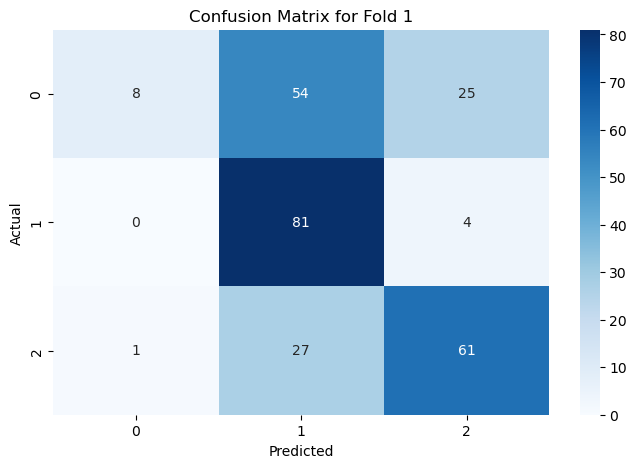

Fold 2:

Confusion Matrix:
 [[ 9 70 13]
 [ 0 87  0]
 [ 1 24 57]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.90      0.10      0.18        92
      netral       0.48      1.00      0.65        87
     positif       0.81      0.70      0.75        82

    accuracy                           0.59       261
   macro avg       0.73      0.60      0.53       261
weighted avg       0.73      0.59      0.51       261

Accuracy:  0.5862068965517241

----------------------



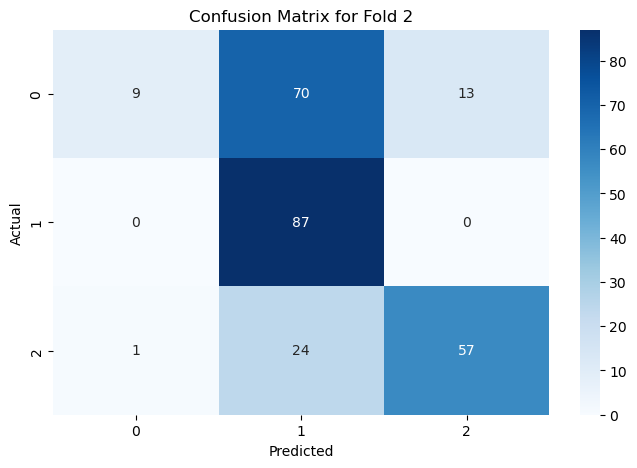

Fold 3:

Confusion Matrix:
 [[ 6 58 19]
 [ 1 90  0]
 [ 2 24 61]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.67      0.07      0.13        83
      netral       0.52      0.99      0.68        91
     positif       0.76      0.70      0.73        87

    accuracy                           0.60       261
   macro avg       0.65      0.59      0.52       261
weighted avg       0.65      0.60      0.52       261

Accuracy:  0.6015325670498084

----------------------



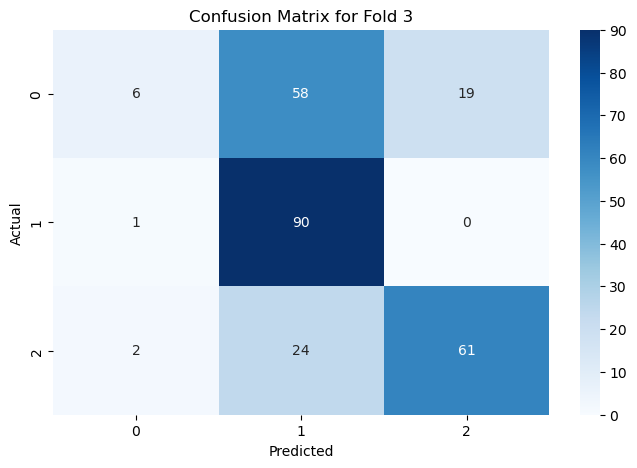

Fold 4:

Confusion Matrix:
 [[10 52 22]
 [ 0 85  0]
 [ 0 24 68]]

Classification Report:
               precision    recall  f1-score   support

     negatif       1.00      0.12      0.21        84
      netral       0.53      1.00      0.69        85
     positif       0.76      0.74      0.75        92

    accuracy                           0.62       261
   macro avg       0.76      0.62      0.55       261
weighted avg       0.76      0.62      0.56       261

Accuracy:  0.6245210727969349

----------------------



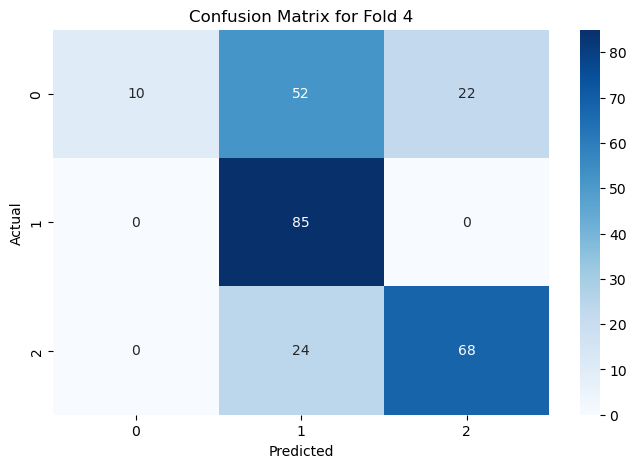

Fold 5:

Confusion Matrix:
 [[ 8 67 19]
 [ 0 79  0]
 [ 0 21 67]]

Classification Report:
               precision    recall  f1-score   support

     negatif       1.00      0.09      0.16        94
      netral       0.47      1.00      0.64        79
     positif       0.78      0.76      0.77        88

    accuracy                           0.59       261
   macro avg       0.75      0.62      0.52       261
weighted avg       0.77      0.59      0.51       261

Accuracy:  0.5900383141762452

----------------------



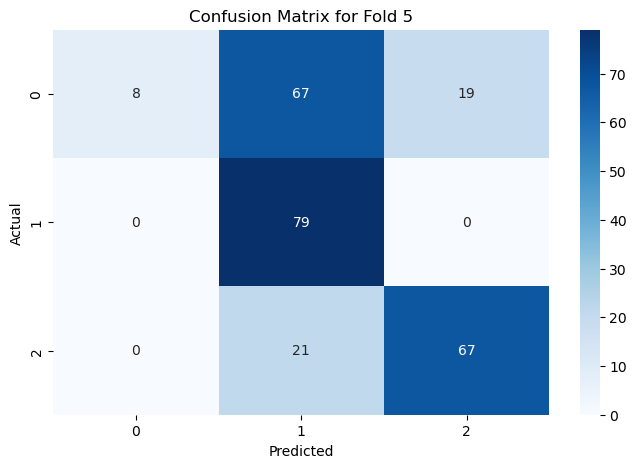

Fold 6:

Confusion Matrix:
 [[ 5 63 24]
 [ 0 90  1]
 [ 2 26 50]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.71      0.05      0.10        92
      netral       0.50      0.99      0.67        91
     positif       0.67      0.64      0.65        78

    accuracy                           0.56       261
   macro avg       0.63      0.56      0.47       261
weighted avg       0.63      0.56      0.46       261

Accuracy:  0.5555555555555556

----------------------



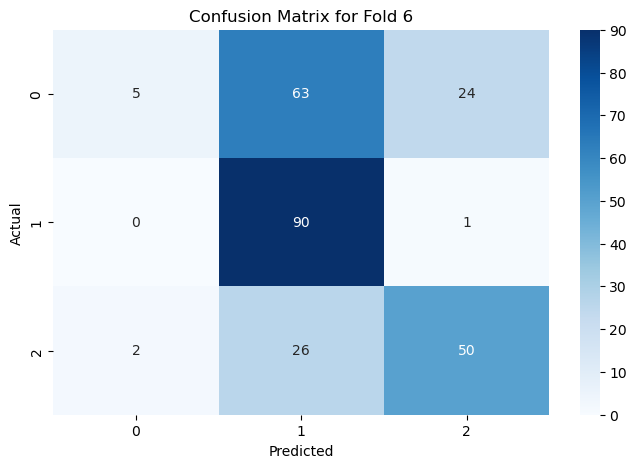

Fold 7:

Confusion Matrix:
 [[ 6 51 28]
 [ 1 94  0]
 [ 1 24 56]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.75      0.07      0.13        85
      netral       0.56      0.99      0.71        95
     positif       0.67      0.69      0.68        81

    accuracy                           0.60       261
   macro avg       0.66      0.58      0.51       261
weighted avg       0.65      0.60      0.51       261

Accuracy:  0.5977011494252874

----------------------



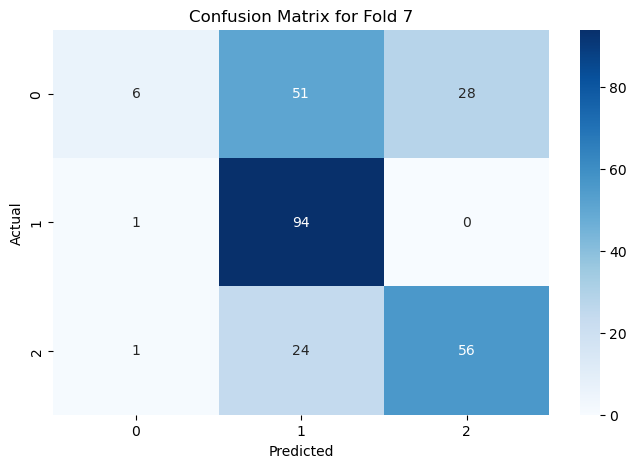

Fold 8:

Confusion Matrix:
 [[ 6 57 17]
 [ 2 85  0]
 [ 0 30 63]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.75      0.07      0.14        80
      netral       0.49      0.98      0.66        87
     positif       0.79      0.68      0.73        93

    accuracy                           0.59       260
   macro avg       0.68      0.58      0.51       260
weighted avg       0.68      0.59      0.52       260

Accuracy:  0.5923076923076923

----------------------



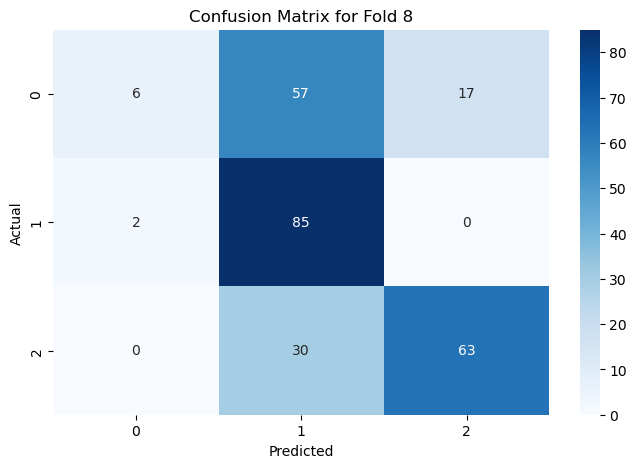

Fold 9:

Confusion Matrix:
 [[10 55 25]
 [ 0 77  1]
 [ 1 27 64]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.91      0.11      0.20        90
      netral       0.48      0.99      0.65        78
     positif       0.71      0.70      0.70        92

    accuracy                           0.58       260
   macro avg       0.70      0.60      0.52       260
weighted avg       0.71      0.58      0.51       260

Accuracy:  0.5807692307692308

----------------------



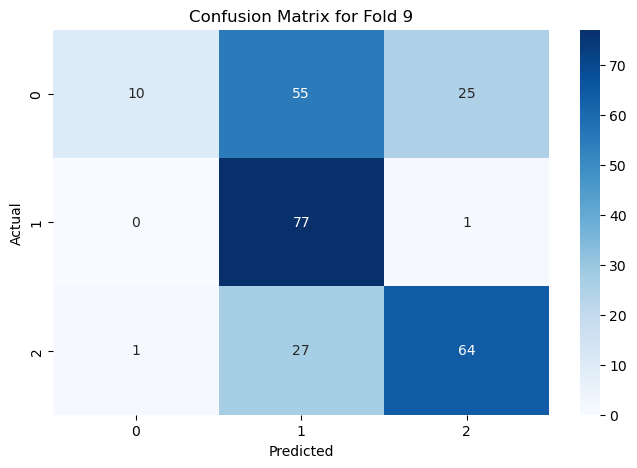

Fold 10:

Confusion Matrix:
 [[12 51 19]
 [ 0 91  0]
 [ 0 28 59]]

Classification Report:
               precision    recall  f1-score   support

     negatif       1.00      0.15      0.26        82
      netral       0.54      1.00      0.70        91
     positif       0.76      0.68      0.72        87

    accuracy                           0.62       260
   macro avg       0.76      0.61      0.56       260
weighted avg       0.76      0.62      0.56       260

Accuracy:  0.6230769230769231

----------------------



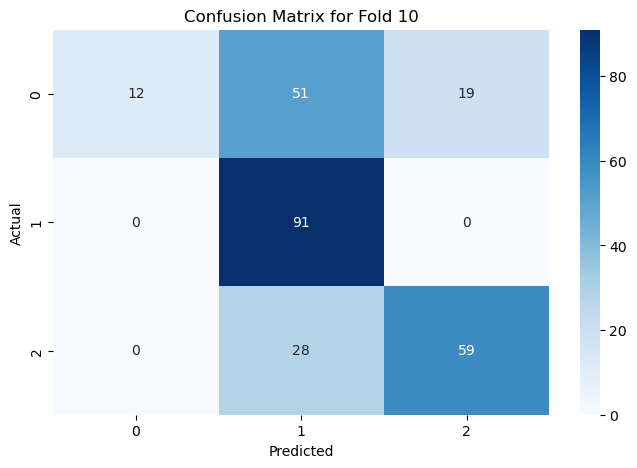

In [16]:
kFold = KFold(n_splits=10, random_state=42, shuffle=True)

for train_index, test_index in kFold.split(X_res):
    X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    accuracies.append(accuracy_score(y_test, y_pred))  
    
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    class_reports.append(classification_report(y_test, y_pred))

for i, (conf_matrix, class_report) in enumerate(zip(conf_matrices, class_reports)):
    print(f"Fold {i+1}:\n")
    print("Confusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)
    print("Accuracy: ", accuracies[i]) 
    print("\n----------------------\n")

    plt.figure(figsize=(8,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Fold {i+1}')
    plt.show()

In [17]:
import numpy as np

In [21]:
# total_conf_matrix = np.zeros((2, 2))
total_conf_matrix = np.zeros((3, 3))

for conf_matrix in conf_matrices:
    total_conf_matrix += conf_matrix

avg_conf_matrix = total_conf_matrix / len(conf_matrices)

print("Rata-Rata Confusion Matrix:\n", avg_conf_matrix)

Rata-Rata Confusion Matrix:
 [[ 8.  57.8 21.1]
 [ 0.4 85.9  0.6]
 [ 0.8 25.5 60.6]]


In [19]:
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)
avg_accuracy = np.mean(accuracies)

print("Rata-Rata Precision: ", avg_precision)
print("Rata-Rata Recall: ", avg_recall)
print("Rata-Rata F1-Score: ", avg_f1_score)
print("Rata-Rata Accuracy: ", avg_accuracy)

Rata-Rata Precision:  0.7011387300853522
Rata-Rata Recall:  0.5924671514909737
Rata-Rata F1-Score:  0.5175568280274354
Rata-Rata Accuracy:  0.5926422045387563


In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

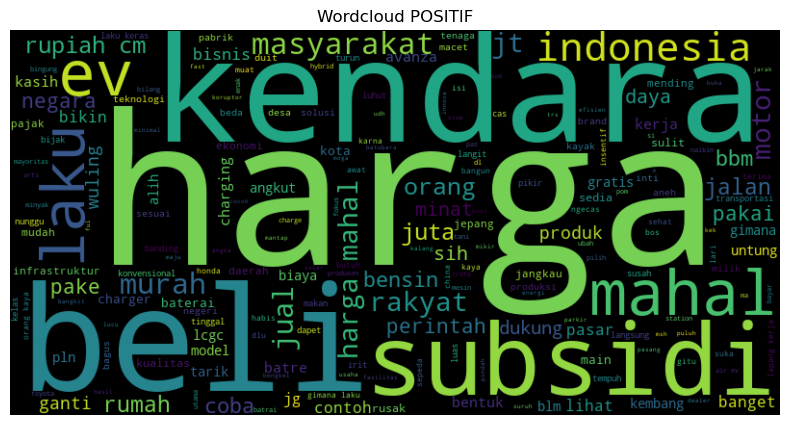

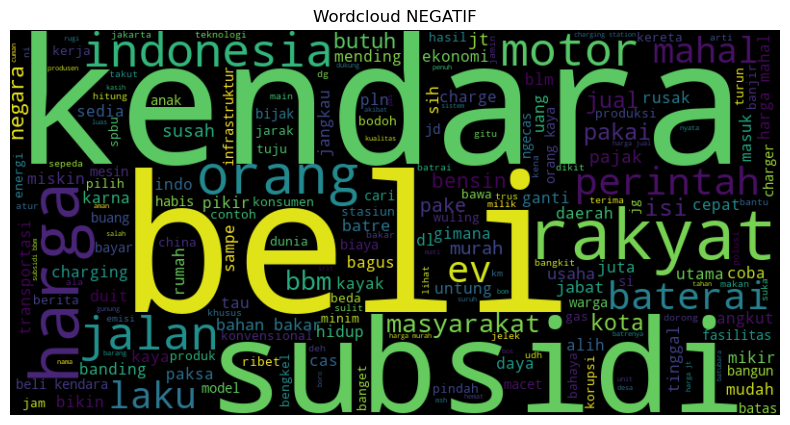

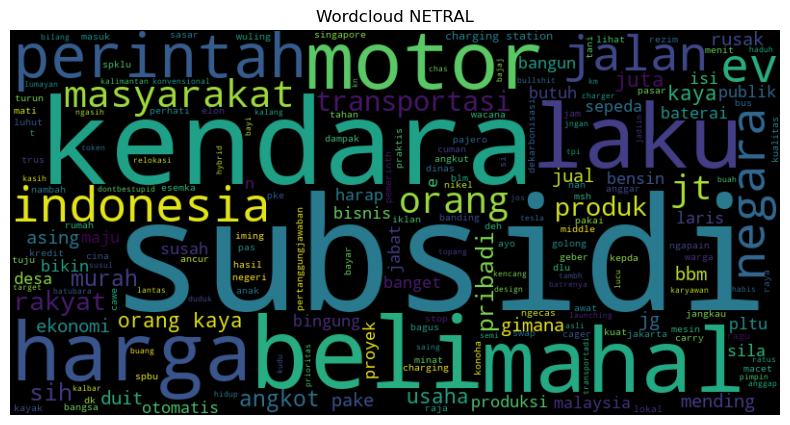

In [23]:
dataCleaning = pd.read_csv('../output/CLEAN-dataset_mobil_listrik.csv')

positive_text = ' '.join(dataCleaning[dataCleaning['sentimen'] == 'positif']['resultStemming'])
negative_text = ' '.join(dataCleaning[dataCleaning['sentimen'] == 'negatif']['resultStemming'])
neutral_text = ' '.join(dataCleaning[dataCleaning['sentimen'] == 'netral']['resultStemming'])

# Hapus tanda '
positive_text = positive_text.replace("'", "")
negative_text = negative_text.replace("'", "")
neutral_text = neutral_text.replace("'", "")

positive_wordcloud = WordCloud(width=800, height=400).generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_text)
neutral_wordcloud = WordCloud(width=800, height=400).generate(neutral_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Wordcloud POSITIF')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Wordcloud NEGATIF')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Wordcloud NETRAL')
plt.axis('off')
plt.show()
